In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pynested_fit as pynf

In [2]:
def gauss(x, u, s):
    return np.exp(-(x-u)**2/(2*s**2)) * (1.0 / (np.sqrt(2 * np.pi) * s))

In [3]:
u = 0.0
s = 1.0
X = np.linspace(u - 10, u + 10, 200)
E = np.empty(200)
E.fill(0.1)
# Get a "random" function
Y = 5 * gauss(X, u + 5, s) + 15 * gauss(X, u - 5, s) * (np.sin(3 * X) + 1)

# Save the function
np.savetxt('ginterp.csv', np.vstack((X, Y, E)).T, delimiter=',')

# Divide the interpolator by 5, shift by 1 and a create an A and x_0 parameters for the calculations
np.savetxt('interp.csv', np.vstack((X - 1, Y / 5)).T, delimiter=',')

In [13]:
npc = pynf.Configurator(
    datafiles=['ginterp.csv'],
    expressions=[r'f(x, A, x_0) = A\texttt{Interpolate}("interp.csv", x - x_0, 1.0)'],
    specstr='x,c,ce',
    params={
        'A': {'value': 2, 'min': 0.1, 'max': 10, 'step': -1},
        'x_0': {'value': 0, 'min': -2, 'max': 2, 'step': -1}
    }
)

output = npc.sample(output_mode='none')
print(output['params']['A'])
print(output['params']['x_0'])

Errors:  None
{'ci_h68': 5.061035450755215, 'ci_h95': 5.07581410181028, 'ci_h99': 5.085675825343572, 'ci_l68': 5.028185052838671, 'ci_l95': 5.009867937563934, 'ci_l99': 5.002693582638381, 'max': 5.043819672963915, 'mean': 5.044476800503137, 'median': 5.04526085678751, 'std': 0.01657884278780733}
{'ci_h68': 0.9955262349007454, 'ci_h95': 0.997427009976972, 'ci_h99': 0.9986487693638131, 'ci_l68': 0.9917822500717999, 'ci_l95': 0.9902037316638388, 'ci_l99': 0.989215937014765, 'max': 0.9938357840338016, 'mean': 0.9937285965640414, 'median': 0.9937291831995674, 'std': 0.0018731816319772416}


In [14]:
cat nf_output_res.dat

 #############_FINAL_RESULTS_#####################################################################################
 N._of_trials:                                      1
 N._of_total_iteration:                          4963
 N._of_likelihood_calls_((1)*1.E+9+(2)):                     0               282191
 N._of_used_livepoints:                           200
 Final_evidence_(log):                     -89.569730344940211     
 Evidence_estimated_uncertainty_(log):     0.23725753306651975     
 Evidence_standard_deviation_(log):         0.0000000000000000     
 ------------------------------------------------------------------------------------------------------------------
 Max_likelihood_(log):  -77.267795554410668     
 Max_parameter_set: 
 A            5.0438196729639149     
 x_0         0.99383578403380157     
 -------------------------------------------------------------------------------------------------------------------
 Mean_value_and_standard_deviation_of_the_parameters
 A 

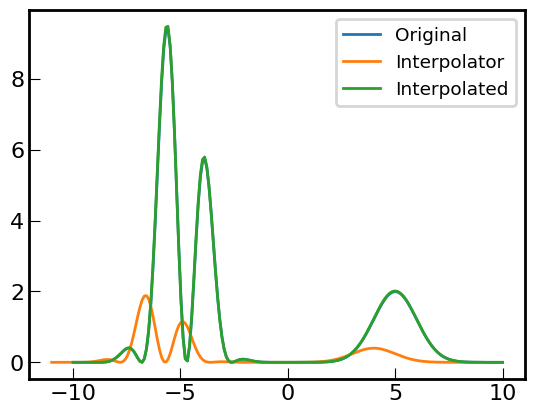

In [16]:
plt.plot(X, Y, label='Original')
plt.plot(X - 1, Y / 5, label='Interpolator')
plt.plot(X - 1 + output['params']['x_0']['max'], Y / 5 * output['params']['A']['max'], label='Interpolated')
plt.legend()